In [1]:
# Input: Defines the input layer of a model and specifies the shape of input data.
# Lambda: Allows you to apply arbitrary expressions or transformations to tensors (e.g., scaling, reshaping).
# Dense: A fully connected layer; often used in the output or intermediate layers.
# Flatten: Converts multi-dimensional tensors (e.g., 2D, 3D) into a 1D array for fully connected layers.
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten

# Model: Helps in creating and combining models using functional APIs.
from tensorflow.keras.models import Model

# ResNet50: Pretrained ResNet-50 model. This model is a deep neural network trained on ImageNet, commonly used for feature extraction or fine-tuning.
from tensorflow.keras.applications.resnet50 import ResNet50

# preprocess_input: Applies preprocessing steps (like scaling, normalization) required for ResNet50.
from tensorflow.keras.applications.resnet50 import preprocess_input

# image: Module for working with image data, including loading and processing images.
# ImageDataGenerator: Augments image data (e.g., rotations, flips) and prepares it for training.
# load_img: Loads an image from a specified file path.
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

# Sequential: A simple way to build models layer-by-layer.
from tensorflow.keras.models import Sequential

# glob: Finds files matching a specified pattern (e.g., *.jpg for all JPG images).
from glob import glob

import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMAGE_SIZE = [224,224]
train_path = 'Datasets/Train'
valid_path = 'Datasets/Test'

In [3]:
# [224,224] is Length and width of image and [3] resembles RGB

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [5]:
# Do not train existing weights

for layer in resnet.layers:
    layer.trainable = False

In [6]:
# Useful for getting number of output classes

folders = glob('Datasets/Train/*')

In [7]:
folders

['Datasets/Train\\audi',
 'Datasets/Train\\lamborghini',
 'Datasets/Train\\mercedes']

In [8]:
x = Flatten()(resnet.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs = resnet.input, outputs=prediction)

In [10]:
# View the structure of the model

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [11]:
# Tell the model what cost and optimization method to use

model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [12]:
# Use the image data generator to import the images from the dataset

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

# We should not do data augmentation in test data
test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure we provide the same target size as initialized for the same size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                target_size = (224,224),
                                                batch_size = 32,
                                                class_mode = 'categorical')

Found 247 images belonging to 3 classes.


In [14]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                           target_size = (224,224),
                                           batch_size = 32,
                                           class_mode = 'categorical')

Found 176 images belonging to 3 classes.


In [15]:
# Fit the model 

r = model.fit(training_set,
             validation_data=test_set,
             epochs=50,
             steps_per_epoch = len(training_set),
             validation_steps = len(test_set))

Epoch 1/50
8/8 [==============================] - 68s 8s/step - loss: 6.4086 - accuracy: 0.2915 - val_loss: 2.8451 - val_accuracy: 0.4886
Epoch 2/50
8/8 [==============================] - 59s 8s/step - loss: 2.9063 - accuracy: 0.3765 - val_loss: 2.7740 - val_accuracy: 0.4432
Epoch 3/50
8/8 [==============================] - 59s 8s/step - loss: 1.8259 - accuracy: 0.4049 - val_loss: 1.7530 - val_accuracy: 0.5114
Epoch 4/50
8/8 [==============================] - 61s 8s/step - loss: 1.2016 - accuracy: 0.5061 - val_loss: 1.4980 - val_accuracy: 0.5170
Epoch 5/50
8/8 [==============================] - 61s 8s/step - loss: 1.1048 - accuracy: 0.5020 - val_loss: 1.2839 - val_accuracy: 0.4773
Epoch 6/50
8/8 [==============================] - 61s 8s/step - loss: 0.9649 - accuracy: 0.5830 - val_loss: 1.0398 - val_accuracy: 0.5511
Epoch 7/50
8/8 [==============================] - 60s 8s/step - loss: 0.9736 - accuracy: 0.5709 - val_loss: 1.9394 - val_accuracy: 0.3466
Epoch 8/50
8/8 [==================

In [16]:
r.history

{'loss': [6.4086384773254395,
  2.9062728881835938,
  1.8258641958236694,
  1.2015777826309204,
  1.1047793626785278,
  0.9648938775062561,
  0.9735737442970276,
  0.9005537629127502,
  0.9373549222946167,
  0.8077338933944702,
  0.8400107026100159,
  0.7937186360359192,
  0.680840790271759,
  0.8961276412010193,
  0.7309924364089966,
  0.681979238986969,
  0.7481170892715454,
  0.8109520077705383,
  0.6488759517669678,
  0.7113694548606873,
  0.619829535484314,
  0.5620002746582031,
  0.5507038235664368,
  0.5425528287887573,
  0.6704806685447693,
  0.6139445304870605,
  0.9232969880104065,
  1.0773831605911255,
  0.8764675259590149,
  0.7486955523490906,
  0.6018398404121399,
  0.5867373943328857,
  0.5854772925376892,
  0.581774890422821,
  0.5515376329421997,
  0.5578451156616211,
  0.7116952538490295,
  1.0263835191726685,
  1.3897126913070679,
  1.4626411199569702,
  0.9082676768302917,
  0.574847400188446,
  0.528176486492157,
  0.5077513456344604,
  0.4998646378517151,
  0.4839

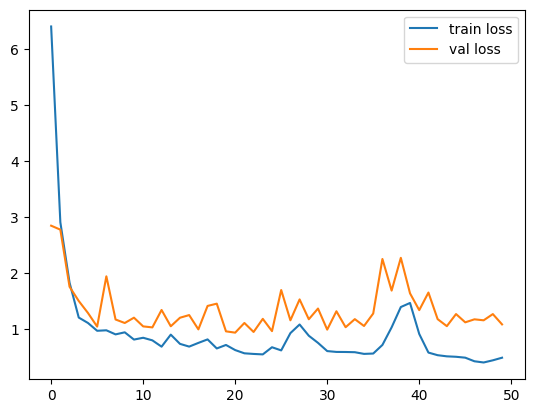

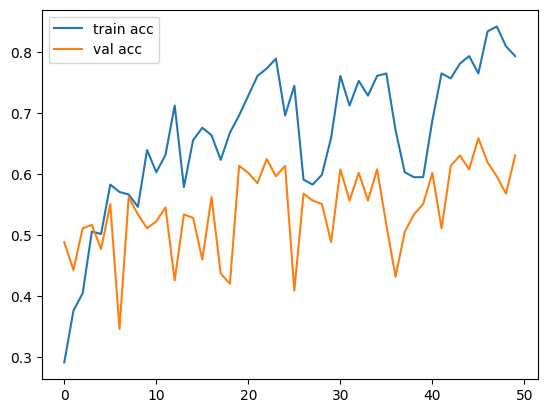

<Figure size 640x480 with 0 Axes>

In [17]:
# Plotting loss
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_acc')

# Plotting accuracy
plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
# Save it as h5 file

from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [19]:
y_pred = model.predict(test_set)

6/6 [==============================] - 26s 4s/step


In [20]:
y_pred

array([[4.65694696e-01, 3.81773561e-01, 1.52531683e-01],
       [2.87065264e-02, 7.78765738e-01, 1.92527771e-01],
       [8.44361365e-01, 4.56213718e-03, 1.51076481e-01],
       [6.81712234e-04, 9.94228005e-01, 5.09024039e-03],
       [7.30166674e-01, 3.62597369e-02, 2.33573616e-01],
       [8.52206126e-02, 8.51672173e-01, 6.31071627e-02],
       [1.48737381e-04, 8.14649999e-01, 1.85201228e-01],
       [4.74498235e-03, 9.09567773e-01, 8.56872797e-02],
       [4.46063932e-03, 9.95203614e-01, 3.35706340e-04],
       [5.20618111e-02, 2.20033601e-01, 7.27904558e-01],
       [8.89309943e-01, 1.71991519e-03, 1.08970247e-01],
       [3.61551568e-02, 2.64952909e-02, 9.37349498e-01],
       [9.80325695e-03, 2.56425500e-01, 7.33771265e-01],
       [1.10156415e-03, 1.91227742e-03, 9.96986210e-01],
       [9.42406178e-01, 6.45503541e-03, 5.11388443e-02],
       [3.29045981e-01, 8.07652548e-02, 5.90188801e-01],
       [8.63160133e-01, 9.63621959e-03, 1.27203643e-01],
       [5.71690761e-02, 1.96676

In [21]:
y_pred = np.argmax(y_pred,axis=1)

In [22]:
y_pred

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 2, 0, 2, 2, 2, 0, 2, 0, 2, 1, 2, 2, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 2, 0, 0, 2, 2, 1, 2, 2,
       1, 0, 2, 1, 2, 2, 2, 2, 1, 1, 0, 2, 2, 2, 1, 1, 2, 2, 0, 1, 2, 2,
       2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 1, 2, 0, 2, 2, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 1, 2, 0, 1, 2, 0, 2, 2, 1, 0, 1, 2, 2, 1, 2, 0, 0, 2, 1, 2,
       0, 1, 2, 2, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 0, 2, 2, 1,
       1, 0, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 0, 1, 2, 2, 2, 1, 0, 1],
      dtype=int64)

In [23]:
model = load_model('model_resnet50.h5')

In [24]:
img = image.load_img('Datasets/Train/lamborghini/10.jpg',target_size=(224,224))

In [25]:
x = image.img_to_array(img)
x

array([[[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        ...,
        [ 13.,   2.,   0.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 18.,   8.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 18.,   8.,   0.],
        [ 18.,   8.,   0.],
        [ 19.,   9.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       ...,

       [[209., 129.,  92.],
        [210., 130.,  93.],
        [212., 132.,  95.],
        ...,
        [216., 132.,  96.],
        [214., 129.,  92.],
        [213., 129.,  92.]],

       [[208., 128.,  91.],
        [208., 128.,  91.],
        [211., 131.,  94.],
        ...,
        [215., 131.,  95.],
        [209., 129.,  94.],
        [207., 129.,  93.]],

       [[206., 128.,  90.],
        [206., 128.,  90.],
        [209., 1

In [26]:
x = x/255
x

array([[[0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        ...,
        [0.05098039, 0.00784314, 0.        ],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       [[0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.05490196, 0.01176471, 0.00392157],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       [[0.07058824, 0.03137255, 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        [0.07450981, 0.03529412, 0.        ],
        ...,
        [0.05490196, 0.01176471, 0.00392157],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       ...,

       [[0.81960785, 0.5058824 , 0.36078432],
        [0.8235294 , 0.50980395, 0.3647059 ],
        [0.83137256, 0

In [27]:
x = np.expand_dims(x,axis=0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [28]:
model.predict(img_data)

1/1 [==============================] - 1s 1s/step


array([[4.6772002e-03, 3.0247788e-06, 9.9531978e-01]], dtype=float32)

In [29]:
a = np.argmax(model.predict(img_data),axis=1)

1/1 [==============================] - 0s 222ms/step


In [30]:
a

array([2], dtype=int64)